In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC, SVC
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

## サポートベクターマシン (SVM)
---
未知のデータに対する汎化能力が高いモデル。サンプルよりも特徴が多い場合に特に有効。基本的には線形分類器だが、カーネル法やカーネルトリックを用いて非線形分類可能。

In [2]:
iris = sns.load_dataset('iris')
iris['species'] = pd.Categorical(iris['species'])
x_clear = iris.loc[iris['species'].cat.codes < 2].values
x_ambiguous = iris.loc[iris['species'].cat.codes > 0].values
y = iris.iloc[:100, -1].cat.codes
print('iris')
display(iris.loc[iris['species'].cat.codes < 2, ['sepal_length', 'sepal_width']])

iris


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
...,...,...
98,5.1,2.5
99,5.7,2.8


In [3]:
from my_functions.svm import algorithm
algorithm.show(x_clear[:, :2], y)

interactive(children=(Dropdown(description='カーネル', options={'線形カーネル': 'linear', 'ガウシアンカーネル': 'rbf'}, value='li…

## 仕組み

### マージン最大化
---
データを2つのクラスに線形に分ける際に、決定境界から最も近いデータまでの距離 (マージン) を最大化するように境界線 (面) を設定することで、未知のデータが入ってきたときの汎化性能の高いモデルを構築する。

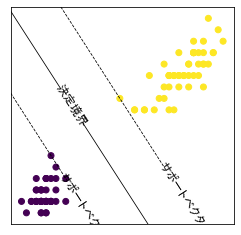

In [4]:
from my_functions.svm import hard_margin
hard_margin.show(x_clear[:, [2, 3]], y)

### ソフトマージン
---
実際のデータは綺麗に線形に分けられることは少ないので、パラメーター`C`によって誤分類の許容度を調整する。 (`C`が小さいほど誤分類を許容する)

In [5]:
from my_functions.svm import soft_margin
soft_margin.show(x_ambiguous[:, [2, 3]], y)

interactive(children=(FloatLogSlider(value=0.31622776601683794, continuous_update=False, description='$C$', ma…

### カーネル
---
詳しい中身は省略するが、データを高次元空間 (再生核ヒルベルト空間) に写像して、その空間で線形分離する超平面を探すカーネル法とその解を求めるためのカーネルトリックを用いて、非線形な決定境界を得る。

<IPython.core.display.Javascript object>


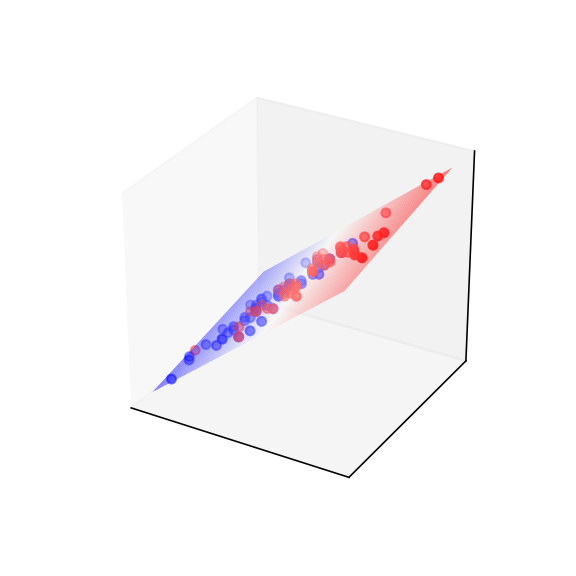

interactive(children=(FloatLogSlider(value=0.1, continuous_update=False, description='$C$', max=2.0, min=-1.0,…

In [6]:
%matplotlib notebook
%matplotlib notebook
from my_functions.svm import kernel
kernel.show(x_ambiguous[:, [0, 1]], y)

## Pythonでのサポートベクターマシンの実行方法
---
`sklearn.svm.LinearSVC` (線形カーネルのみ) または`sklearn.svm.SVC`を使用する。

In [7]:
LinearSVC??

In [8]:
SVC??